# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

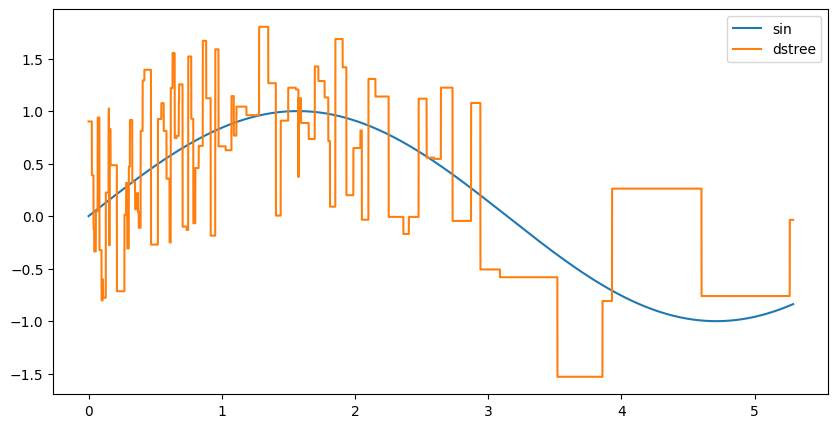

In [3]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(5252)
x = np.random.exponential(1, sample_size)
dev = np.random.uniform(-1, 1, sample_size)
y = f(x) + dev
sz = 52000
md = DecisionTreeRegressor()
md.fit(x.reshape(-1, 1), y)
ax = np.linspace(0, x.max(), sz)   
y_p = md.predict(ax.reshape(-1, 1))
plt.figure(figsize=(10, 5))
plt.plot(ax, f(ax), label='sin')
plt.plot(ax, y_p, label ='dstree')
plt.legend()
plt.show()


__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

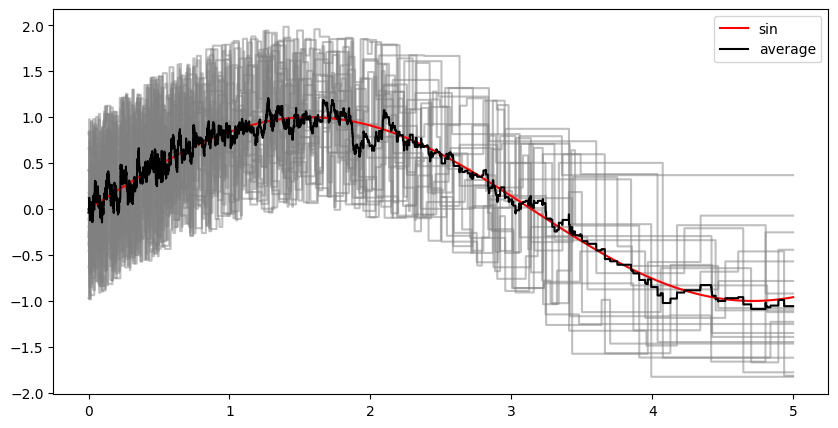

In [4]:
def depth(a):
    plt.figure(figsize=(10, 5))
    res = np.zeros(sz)
    for i in range(a):
        x = np.random.exponential(1, sample_size)
        dev = np.random.uniform(-1, 1, sample_size)
        y = f(x) + dev
        md = DecisionTreeRegressor()
        md.fit(x.reshape(-1, 1), y)
        ax = np.linspace(0, 5, sz)   
        y_p = md.predict(ax.reshape(-1, 1))
        res += y_p
        plt.plot(ax, y_p, color='gray', alpha = 0.5)
    res/=a
    plt.plot(ax, f(ax), label='sin', color='red')
    plt.plot(ax, res, label='average', color='black')
    plt.legend()
    plt.show()

depth(samples_num)

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

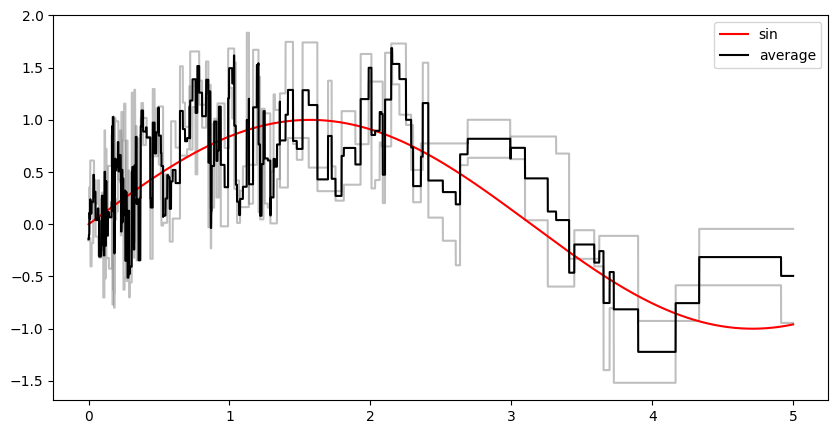

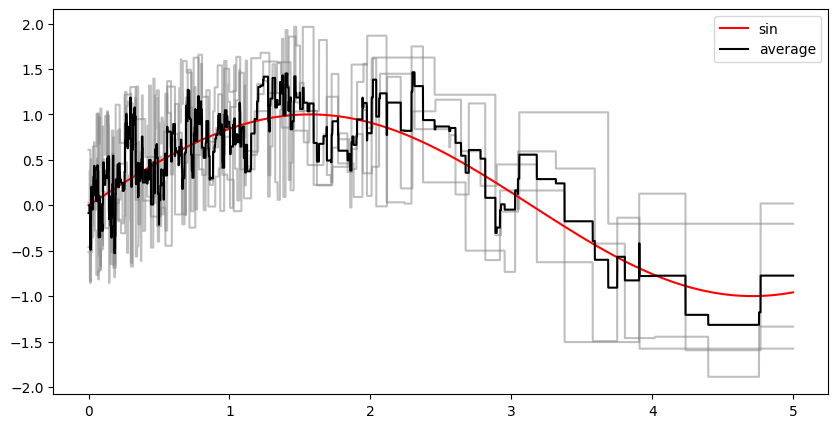

In [5]:
depth(2)
depth(4)

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**
вау, Деревья с маленькой глубиной дают +- рандомный результат. Когда глубина большая там ближе к нулю

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [6]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [7]:
from importlib import reload
from matplotlib import pyplot as plt

import hw3code
reload(hw3code)

<module 'hw3code' from 'c:\\me\\ML-11\\ML-AESC-11-RD\\dstree\\hw3code.py'>

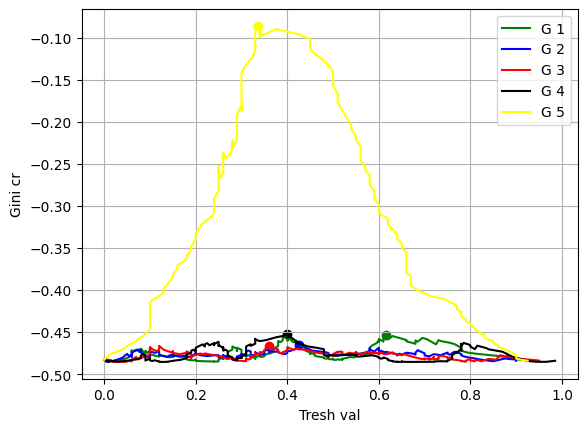

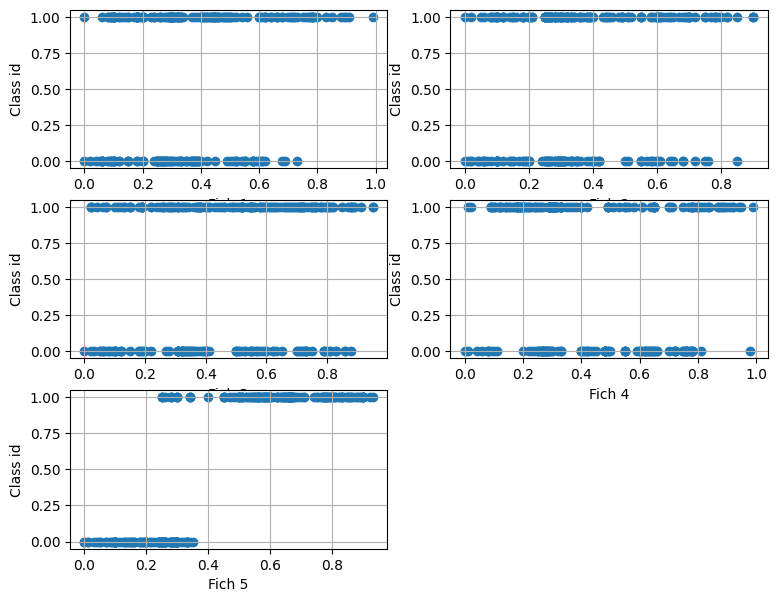

In [8]:

X = data.iloc[:, :-1]
y = data.iloc[:, -1].values


plt.figure()
cv = ["green", "blue", "red", "black", "yellow"]
for i in range(X.shape[1]):
    dirs = X.iloc[:, i].values.astype(float)
    res = hw3code.find_best_split(dirs, y)
    plt.plot(res[0], res[1], label=f'G {i+1}', color=cv[i])
    plt.scatter([res[2]], [res[3]], color=cv[i])

plt.xlabel('Tresh val')
plt.ylabel('Gini cr')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(9, 7))
for i in range(X.shape[1]):
    plt.subplot(3, 2, i+1)
    plt.scatter( X.iloc[:, i].values.astype(float), y, alpha=1)
    plt.xlabel(f'Fich {i+1}')
    plt.ylabel('Class id')
    plt.grid(True)

plt.show()


__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Пятый лучше. У него критерий при пороге в 0.4 около 0.1; На scatter графике классы почти полностью поделены без пересечений долей.

У класса 5 график похож на параболы ветвями вниз

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [9]:
# dm = pd.read_csv("agaricus-lepiota.data", names=["edibility"])
dm = pd.read_csv("agaricus-lepiota.data")
from sklearn.preprocessing import LabelEncoder
import sklearn
encr = LabelEncoder()
for c in dm.columns:
    
    dm[c] = encr.fit_transform(dm[c])
msk = np.random.rand(len(dm.iloc[:, 0])) < 0.5
train = dm[msk]
test = dm[~msk]

X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]
dm.head()

mush_tree = DecisionTreeRegressor()
mush_tree.fit(X_train, y_train)
y_pred = mush_tree.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, y_pred)
print(acc)
print(mush_tree.get_depth())


1.0
7


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [10]:
# dm = pd.read_csv("agaricus-lepiota.data", names=["edibility"])
dcard = pd.read_csv("dataset.csv")
dcard = dcard.iloc[:10000]
dcard = dcard.select_dtypes(include=['float', 'int'])
dcard = dcard.fillna(0)
dcard

C:\Users\forxh\AppData\Local\Temp\ipykernel_15280\2559984780.py:2: DtypeWarning: Columns (11,13,15,35,41,51,115) have mixed types. Specify dtype option on import or set low_memory=False.
  dcard = pd.read_csv("dataset.csv")


,3,1.0,0,1,1.1,0.1
0,4,1.0,0,2,2,0
1,5,1.0,0,1,3,2
2,6,1.0,0,1,2,1
3,8,1.0,0,1,1,0
4,9,0.0,0,1,1,0
...,...,...,...,...,...,...
9995,19929,1.0,0,1,1,0
9996,19931,1.0,0,2,2,0
9997,19932,0.0,0,1,1,0
9998,19933,1.0,2,1,4,1


In [21]:
msk = np.random.rand(len(dcard.iloc[:, 0])) < 0.7
train = dcard[msk]
test = dcard[~msk]

X_train = train.iloc[:, 2:]
y_train = train.iloc[:, 1]
X_test = test.iloc[:, 2:]
y_test = test.iloc[:, 1]
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train

1       1
2       1
3       1
4       0
7       0
       ..
9993    1
9994    1
9995    1
9996    1
9999    1
Name: 1.0, Length: 7031, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(random_state=1024)
scores_dt = cross_val_score(dt, X_train, y_train, cv=3, scoring='accuracy')
print("decis acc:", scores_dt.mean())

bg = BaggingClassifier(n_estimators=100, random_state=2134)
scores_bag = cross_val_score(bg, X_train, y_train, cv=3, scoring='accuracy')
print("bagging acc", scores_bag.mean())

rf = RandomForestClassifier(n_estimators=100, random_state=55124)
scores_rf = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
print("rf acc:", scores_rf.mean())

# не очень возрастает :(

decis acc: 0.7553690901224911
bagging acc 0.7560803074731354
rf acc: 0.7560803074731354


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

In [ ]:
plt.figure()
x_vals = []
y_valsb = []
y_valsr = []
for sz in range(20, 1000, 20):

    x_vals.append(sz)
    bg = BaggingClassifier(n_estimators=sz, random_state=2134)
    scores_bag = cross_val_score(bg, X_train, y_train, cv=3, scoring='accuracy')
    y_valsb.append(scores_bag.mean())

    rf = RandomForestClassifier(n_estimators=sz, random_state=55124)
    scores_rf = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
    y_valsr.append(scores_rf.mean())
plt.plot(x_vals, y_valsb, label = 'bagging')
plt.plot(x_vals,y_valsr, label = 'random forest')
plt.xlabel("num of tree")
plt.ylabel("accureacy")
plt.legend()
plt.show()


In [ ]:
# Переобучился :(